<a href="https://colab.research.google.com/github/Chhayaonly/food101/blob/main/week1Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/california_housing_train.csv')


In [3]:
arr = np.array(df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_train = np.array(df['median_house_value'])  # extract the price column from data
x_train = arr.T



In [4]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MSE loss
 """
  m=y_pred.shape[0]

  diff = np.subtract(y_pred,y_true)
  sq=np.matmul(diff.T,diff)
  mse=np.sum(sq)/(2*m)
  return mse

In [5]:
def y_prediction(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """
  m,n = x.shape
  bais_mat=np.full((m,),b)
  y_pred =np.matmul(x,a) + bais_mat

  assert(y_pred.shape == (m,))
  return y_pred

In [6]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y_prediction(x,a,b)

  # Compute gradient for weights a as da
  diff = np.subtract(yp,y_true)
  da=(np.matmul(diff.T,x))/m

  # Compute gradients for bias b as db
  db=np.sum(diff.T)/m
  assert(da.shape ==(n,))
  return (da,db)

In [7]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.random.normal(0, 0.5, size = (n,)) * np.sqrt(2/n)     # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    derivativea,derivativeb=gradient(x,a,b,y_true)
    # apply gradient descent now to update a and b
    a= a- learning_rate*derivativea
    b= b- learning_rate*derivativeb
    # calculate loss at this point using loss() function
    # Store loss in the list loss_mse
    yp = y_prediction(x,a,b)
    currentloss=loss(yp,y_true)
    loss_mse.append(currentloss)
    print("Epoch ",i+1," Completed!","loss = ",currentloss) #print l_mse

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

In [12]:
epochs = 400          # tweak this!!!
learn_rate = 0.02          # choose learning rate wisely otherwise loss may diverge!!

train_loss ,a,b = gradient_descent(x_train, y_train, learn_rate, epochs)
print(train_loss)

Epoch  1  Completed! loss =  27218770332.299095
Epoch  2  Completed! loss =  26264623174.626976
Epoch  3  Completed! loss =  25348482411.28265
Epoch  4  Completed! loss =  24468790231.426964
Epoch  5  Completed! loss =  23624058264.243385
Epoch  6  Completed! loss =  22812863694.22819
Epoch  7  Completed! loss =  22033845698.57086
Epoch  8  Completed! loss =  21285702168.738274
Epoch  9  Completed! loss =  20567186683.643833
Epoch  10  Completed! loss =  19877105706.27565
Epoch  11  Completed! loss =  19214315979.492916
Epoch  12  Completed! loss =  18577722099.973816
Epoch  13  Completed! loss =  17966274252.09642
Epoch  14  Completed! loss =  17378966085.925602
Epoch  15  Completed! loss =  16814832725.526003
Epoch  16  Completed! loss =  16272948895.573698
Epoch  17  Completed! loss =  15752427155.741299
Epoch  18  Completed! loss =  15252416233.620491
Epoch  19  Completed! loss =  14772099448.052807
Epoch  20  Completed! loss =  14310693215.692095
Epoch  21  Completed! loss =  1386

Epoch  1  Completed! loss =  26610484136.966293
Epoch  2  Completed! loss =  25678080585.99591
Epoch  3  Completed! loss =  24783303656.233948
Epoch  4  Completed! loss =  23924529228.095108
Epoch  5  Completed! loss =  23100217802.766285
Epoch  6  Completed! loss =  22308908123.302616
Epoch  7  Completed! loss =  21549211500.016994
Epoch  8  Completed! loss =  20819806744.81179
Epoch  9  Completed! loss =  20119435632.95958
Epoch  10  Completed! loss =  19446898822.64213
Epoch  11  Completed! loss =  18801052172.609486
Epoch  12  Completed! loss =  18180803406.885563
Epoch  13  Completed! loss =  17585109082.744743
Epoch  14  Completed! loss =  17012971824.40444
Epoch  15  Completed! loss =  16463437790.18206
Epoch  16  Completed! loss =  15935594345.387688
Epoch  17  Completed! loss =  15428567917.082836
Epoch  18  Completed! loss =  14941522010.128614
Epoch  19  Completed! loss =  14473655366.758904
Epoch  20  Completed! loss =  14024200254.316244
Epoch  21  Completed! loss =  13592

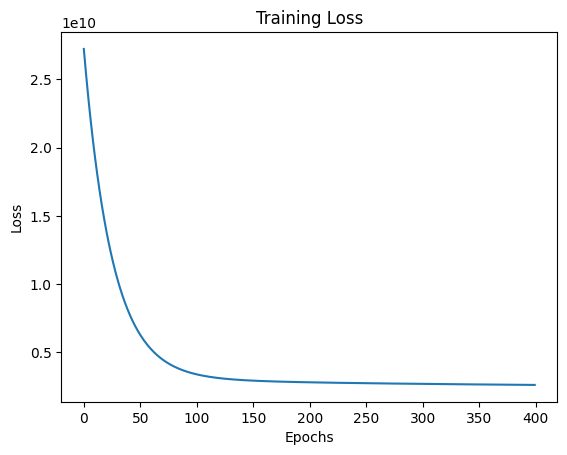

In [13]:
test_df = pd.read_csv("/content/california_housing_test.csv")

arr = np.array(test_df.drop('median_house_value', axis=1)).T

for i in range(len(arr)):
  arr[i] = (arr[i]-np.mean(arr[i]))/np.std(arr[i], axis=0)

y_test = np.array(test_df['median_house_value'])                                                                                                            # extract the price column from data

x_test = arr.T
test_loss ,a,b = gradient_descent(x_test, y_test, learn_rate, epochs)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot([i for i in range(epochs)], train_loss)     # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()